<a href="https://colab.research.google.com/github/puneat/ML_project_UCS611/blob/master/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
cd /gdrive/My Drive/ml

/gdrive/My Drive/ml


In [0]:
import numpy as np
import csv
from numpy import array
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

In [0]:
with open('case_time_series.csv', 'r') as f:
    cases = list(csv.reader(f, delimiter=','))
cases=array(cases)
num_days = np.linspace(1,cases.shape[0]-1 , cases.shape[0]-1)
total_cases=cases[1:,[2,4,6]];
total_cases.astype(int);

daily_cases=cases[1:,[1,3,5]];
daily_cases.astype(int);



In [0]:
def plot_data(num_days,total_cases, label0, label1, label2,plot_title):
  fig = plt.figure(facecolor='w')
  ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

  num_days_new = np.linspace(t.min(), t.max(), 300) 

  spl1 = make_interp_spline(num_days,total_cases[:,0], k=3)  # type: BSpline
  power_smooth1 = spl1(num_days_new)

  spl2 = make_interp_spline(num_days,total_cases[:,1], k=3)  # type: BSpline
  power_smooth2 = spl2(num_days_new)

  spl3 = make_interp_spline(num_days,total_cases[:,2], k=3)  # type: BSpline
  power_smooth3 = spl3(num_days_new)


  ax.plot(num_days_new, power_smooth1, linewidth=2, label=label0)
  ax.plot(num_days_new, power_smooth2, linewidth=2, label=label1)
  ax.plot(num_days_new, power_smooth3, linewidth=2, label=label2)

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Patients')
  ax.set_title(plot_title)
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

  plt.show()

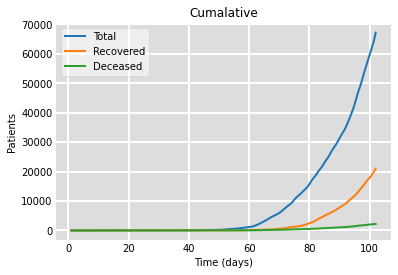

In [120]:
plot_data(num_days,total_cases,'Total','Recovered','Deceased','Cumalative')

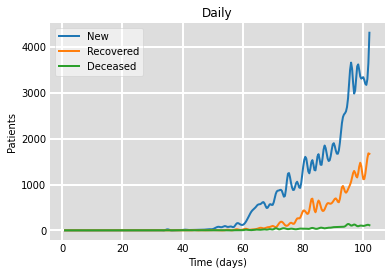

In [121]:
plot_data(num_days,daily_cases,'New','Recovered','Deceased','Daily')